In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Check for Null Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
catcol = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

EDA

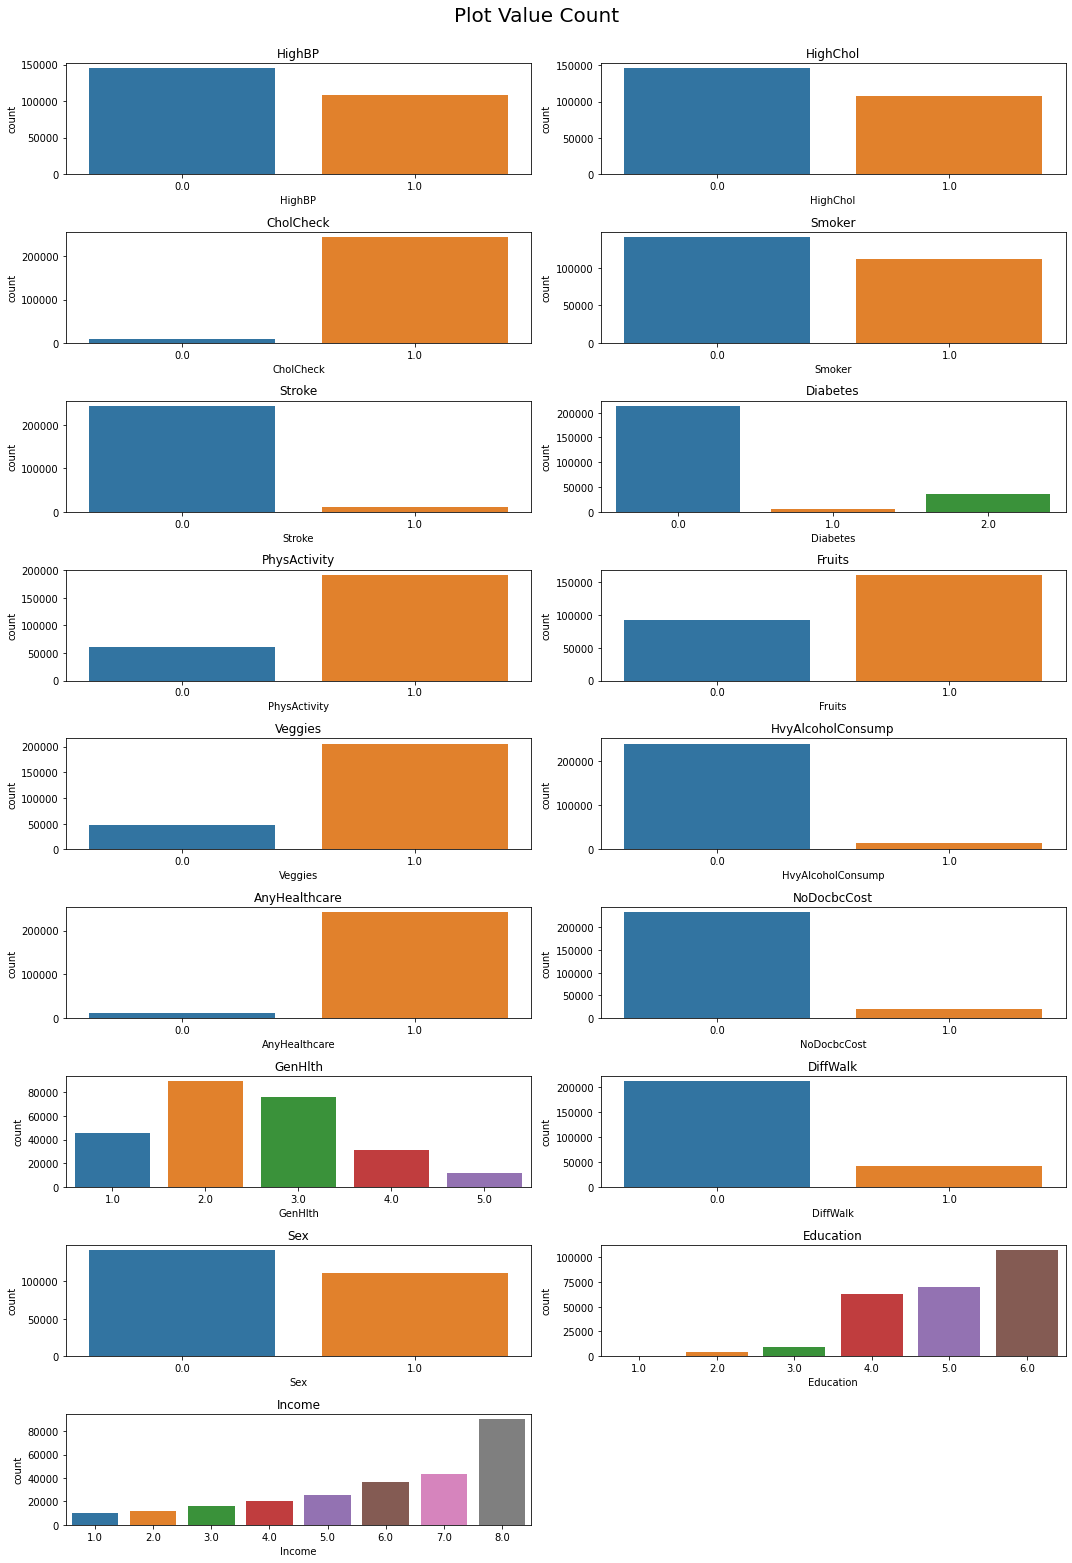

In [7]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

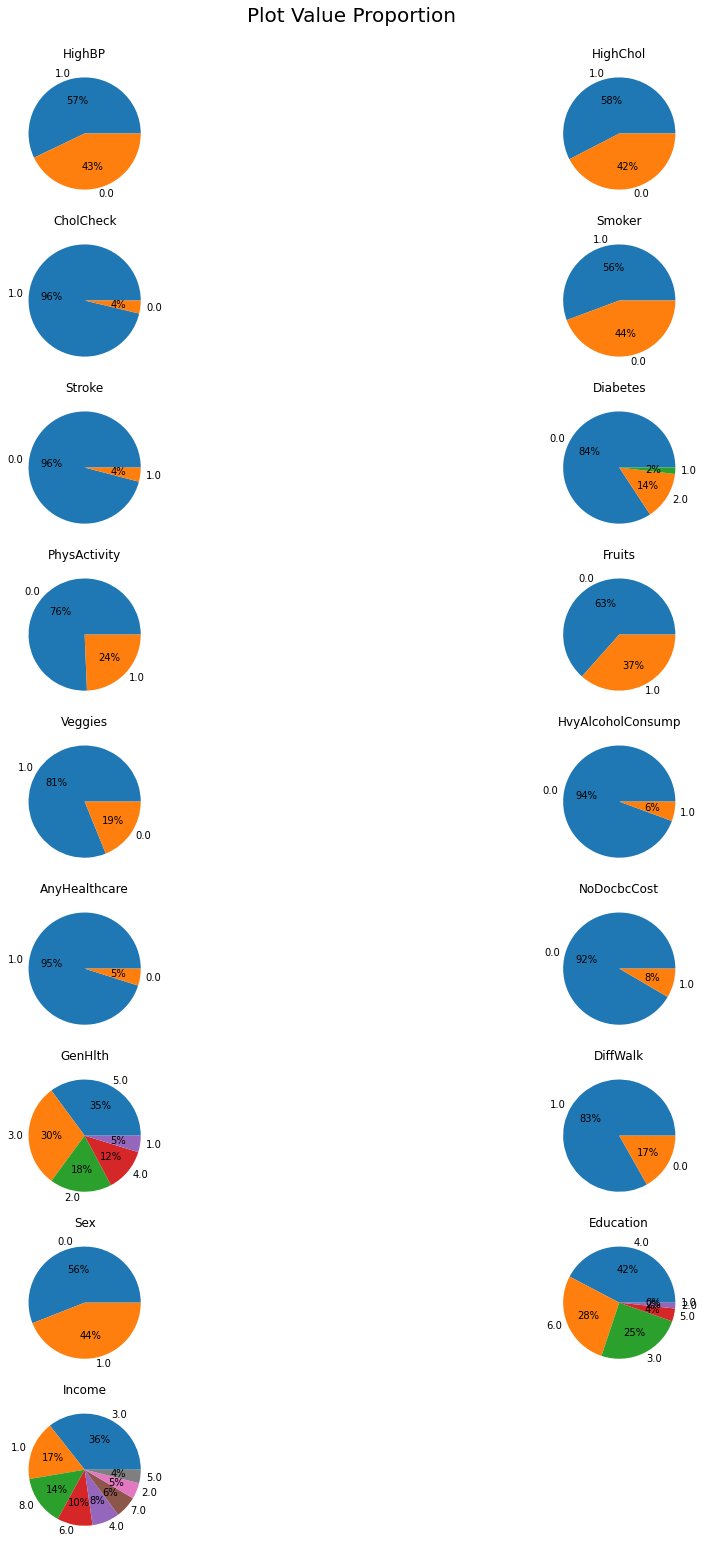

In [8]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

Check for outliers

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Creating boxplots for variables having a large difference in 75th percentiles and the max value

<AxesSubplot:title={'center':'Stroke'}, xlabel='HeartDiseaseorAttack'>

<AxesSubplot:title={'center':'Diabetes'}, xlabel='HeartDiseaseorAttack'>

<AxesSubplot:title={'center':'MentHlth'}, xlabel='HeartDiseaseorAttack'>

<AxesSubplot:title={'center':'PhysHlth'}, xlabel='HeartDiseaseorAttack'>

<AxesSubplot:title={'center':'Age'}, xlabel='HeartDiseaseorAttack'>

<AxesSubplot:title={'center':'BMI'}, xlabel='HeartDiseaseorAttack'>

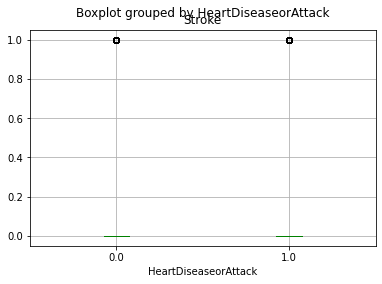

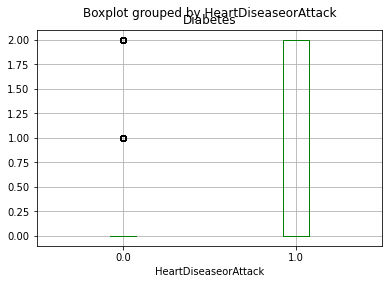

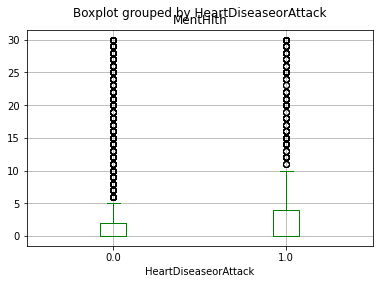

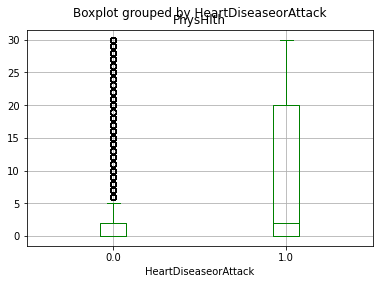

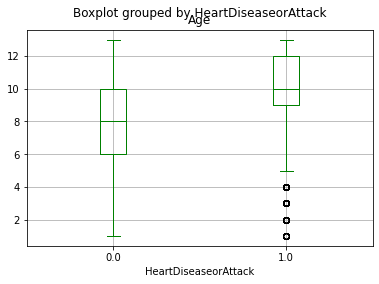

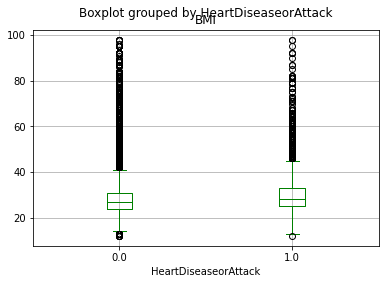

In [19]:
display(df.boxplot(column=['Stroke'],by="HeartDiseaseorAttack",color="green"))
display(df.boxplot(column=['Diabetes'],by="HeartDiseaseorAttack",color="green"))
display(df.boxplot(column=['MentHlth'],by="HeartDiseaseorAttack",color="green"))
display(df.boxplot(column=['PhysHlth'],by="HeartDiseaseorAttack",color="green"))
display(df.boxplot(column=['Age'],by="HeartDiseaseorAttack",color="green"))
display(df.boxplot(column=['BMI'],by="HeartDiseaseorAttack",color="green"))

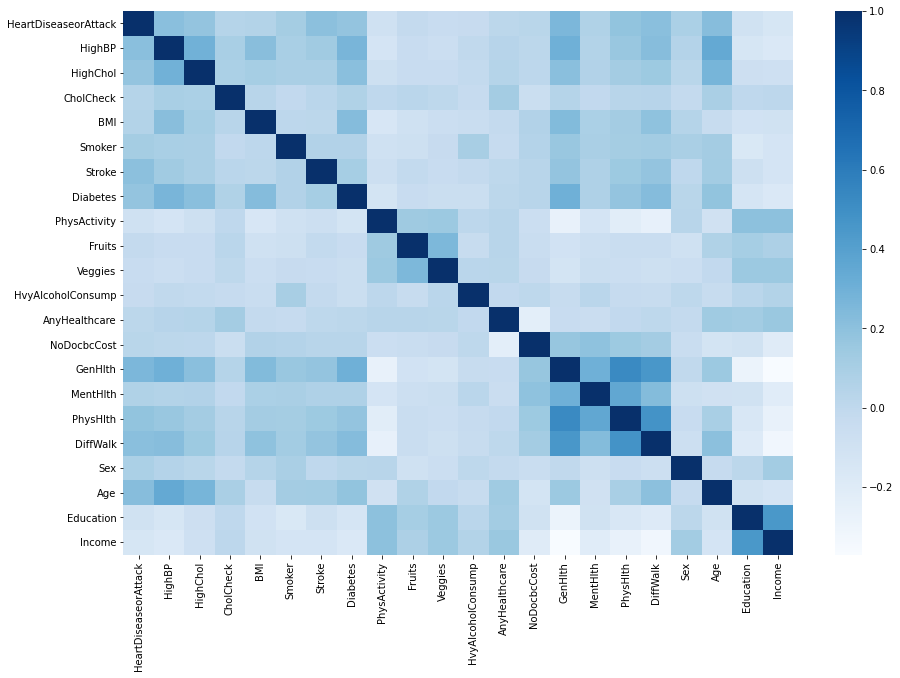

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 
plt.show()

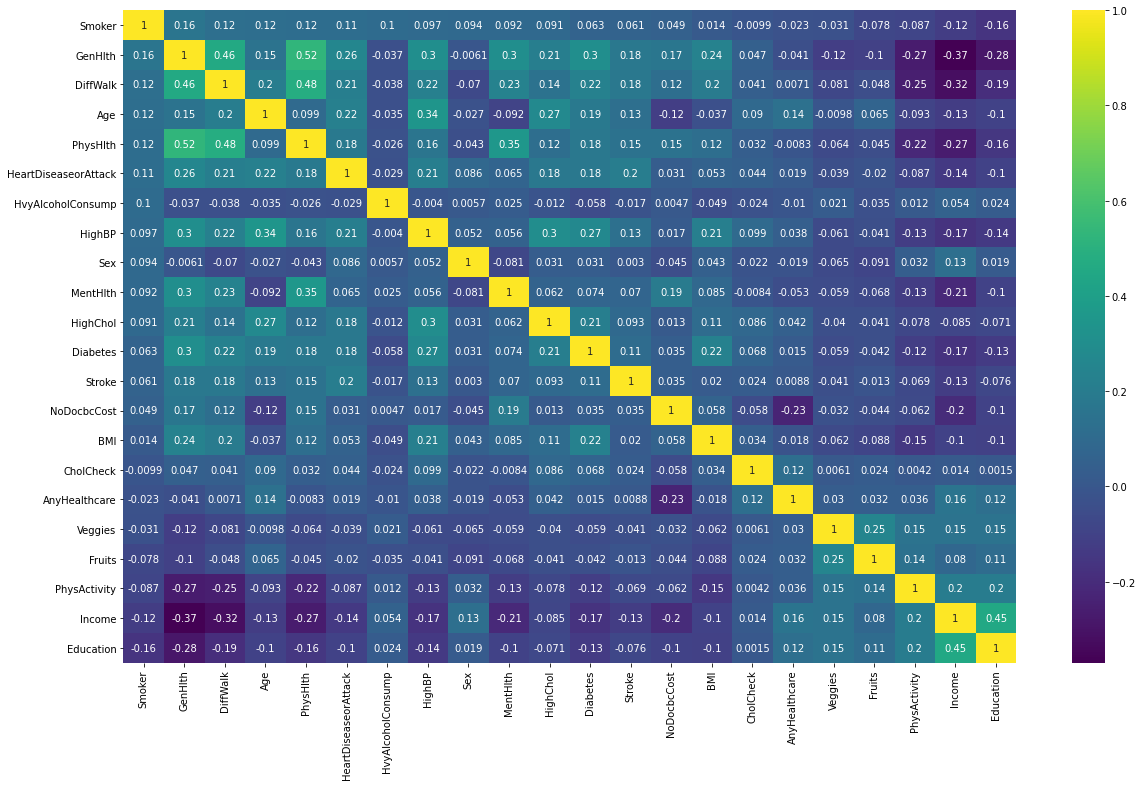

In [14]:
#Quality correlation matrix
k = 22 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Smoker')['Smoker'].index
cm = df[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

Checking the distribution of target variable

In [6]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [7]:
#select HeartDiseaseorAttack as target variable:
y = df['HeartDiseaseorAttack']

#select all the other columns minus HeartDiseaseorAttack as the feature variables:
X = df.drop(['HeartDiseaseorAttack'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('Dimensions: \n x_train:{} \n x_test{} \n y_train{} \n y_test{}'.format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

Dimensions: 
 x_train:(202944, 21) 
 x_test(50736, 21) 
 y_train(202944,) 
 y_test(50736,)


In [10]:
from xgboost import XGBClassifier

In [11]:
# code from kaggle notebook
algorithm = [
#     LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]


# Data without resample
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for cla in algorithm:
    cla.fit(X_train, Y_train)
    name = cla.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = cla.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = cla.predict(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 89.5715%
Log Loss: 3.601890205865401


RandomForestClassifier
****Results****
Accuracy: 90.2988%
Log Loss: 3.350686446087948




/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Accuracy: 90.8053%
Log Loss: 3.175729038209235


AdaBoostClassifier
****Results****
Accuracy: 90.9039%
Log Loss: 3.1416928733558267


GradientBoostingClassifier
****Results****
Accuracy: 90.9729%
Log Loss: 3.1178631136491672




Random Forest

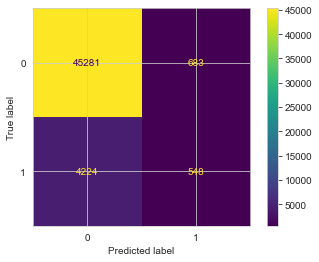

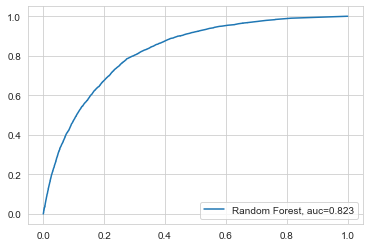

In [36]:
# Random Forest & Confusion Matrix
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, n_jobs=-1, random_state=0)
rf.fit(X_train,Y_train)

ypr = rf.predict(X_test)
yprob = rf.predict_proba(X_test)

# Let's evaluate our RF
conf = confusion_matrix(Y_test,ypr)
ConfusionMatrixDisplay(conf).plot()
plt.show()

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(Y_test, yprob[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = Y_test, y_score = yprob[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label=f"Random Forest, auc={auc}")
plt.legend(loc=4)
plt.show()

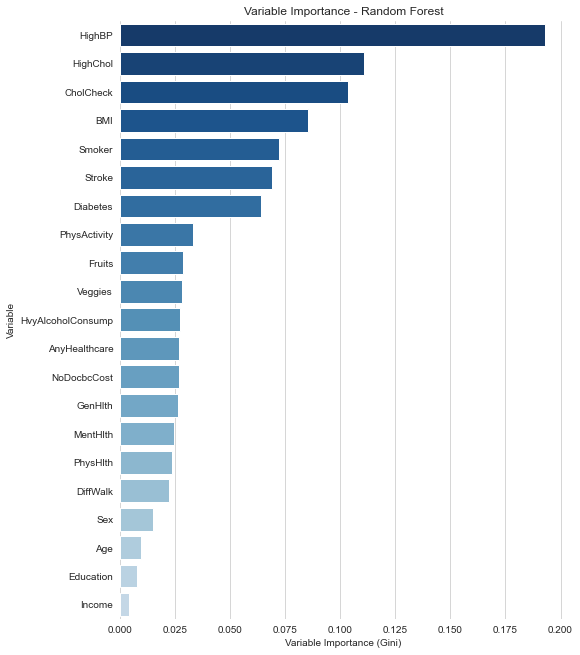

In [41]:
# Plot variable importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] 

pal = sns.color_palette("Blues", 28)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,11))
sns.barplot(y=X.columns,x=importances[indices],label="Total",palette=np.array(pal[::-1]))
plt.title("Variable Importance - Random Forest")
ax.set(ylabel="Variable",xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)
plt.show()

Make classes Balanced - decreases auc

In [13]:
# Random Forest & Confusion Matrix
rf_b = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, n_jobs=-1, random_state=0,
                             class_weight='balanced')

param_grid = dict({'n_estimators': [10, 50, 100, 200, 500, 1000, 1500]})

# Tune the model to find the optimal number of trees                   
grid = GridSearchCV(rf_b, param_grid, cv = 2, scoring = 'roc_auc', n_jobs = -1, refit = False)
grid.fit(X_train,Y_train)

display(grid.cv_results_)
display(grid.best_params_)


{'mean_fit_time': array([  3.59796548,  14.70300508,  28.10612154,  52.93754494,
        134.53733587, 257.23978043, 279.20704162]),
 'std_fit_time': array([0.0685885 , 0.14556193, 0.09122753, 0.22768199, 0.31816196,
        0.8188436 , 0.30645454]),
 'mean_score_time': array([ 0.39592898,  2.09233904,  5.319875  ,  9.52552402, 25.07901609,
        50.01872349, 40.92396641]),
 'std_score_time': array([0.0205611 , 0.02355385, 0.0708971 , 0.04843605, 0.07856596,
        0.0604887 , 0.07576752]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 200, 500, 1000, 1500],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 500},
  {'n_estimators': 1000},
  {'n_estimators': 1500}],
 'split0_test_score': array([0.75115886, 0.80738635, 0.81454952, 0.8183879 , 0.82018736,
        0.82122695, 0.8214

{'n_estimators': 1500}

Create the best model using optimal number of trees

In [14]:
rf_optimal = RandomForestClassifier(n_estimators=1500, criterion='gini', max_depth=None, n_jobs=-1, random_state=0,
                             class_weight='balanced')

rf_optimal.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1500, n_jobs=-1,
                       random_state=0)

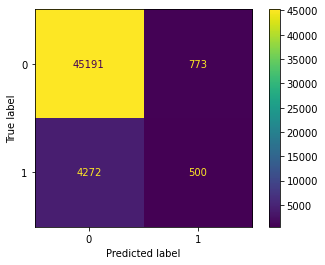

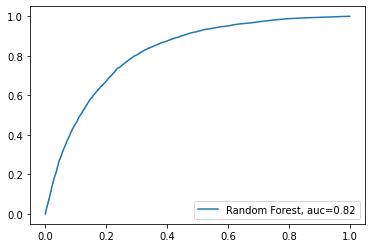

In [16]:
ypr_bal = rf_optimal.predict(X_test)
yprob_bal = rf_optimal.predict_proba(X_test)

# Let's evaluate our RF
conf = confusion_matrix(Y_test,ypr_bal)
ConfusionMatrixDisplay(conf).plot()
plt.show()

# Calculate the ROC curve points
fpr_bal, tpr_bal, _ = roc_curve(Y_test, yprob_bal[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_rf_bal = np.round(roc_auc_score(y_true = Y_test, y_score = yprob_bal[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr_bal,tpr_bal,label=f"Random Forest, auc={auc_rf_bal}")
plt.legend(loc=4)
plt.show()

Logistic Regression

In [9]:
# Logistic Regression & Confusion Matrix
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train,Y_train)
ypr = logistic_model.predict(X_test)
yprob = logistic_model.predict_proba(X_test)
# Let's evaluate our RF
conf = confusion_matrix(Y_test,ypr)
ConfusionMatrixDisplay(conf).plot()
plt.show()

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(Y_test, yprob[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = Y_test, y_score = yprob[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label=f"Bankloan RF, auc={auc}")
plt.legend(loc=4)
plt.show()
print(accuracy_score(Y_test, ypr))

AttributeError: 'str' object has no attribute 'decode'

In [19]:
# XGBClassifier
gb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, booster='gbtree', gamma=0.001, random_state=0)
param_grid = dict({'n_estimators': [10, 50, 100, 200],'max_depth': [2, 3],'learning_rate' : [0.01, 0.1]})

grid = GridSearchCV(gb, param_grid, cv = 2, scoring = 'roc_auc', n_jobs = -1, refit = False)
grid.fit(X_train,Y_train)

display(grid.cv_results_)
display(grid.best_params_)

{'mean_fit_time': array([ 1.52721953,  5.6115005 , 10.63070643, 20.8726964 ,  1.84052444,
         7.75163543, 15.41087949, 30.41191041,  1.27710235,  5.51612771,
        10.6678611 , 20.98107612,  1.78503799,  7.92102456, 15.65141499,
        18.14247239]),
 'std_fit_time': array([0.00978947, 0.07076859, 0.03240144, 0.01580572, 0.05568147,
        0.19775045, 0.18907964, 0.29451644, 0.01034153, 0.02685654,
        0.00187385, 0.04095924, 0.08645105, 0.04104352, 0.07685602,
        0.04785144]),
 'mean_score_time': array([0.1578356 , 0.16147804, 0.24488986, 0.31212568, 0.13443553,
        0.17263794, 0.24649048, 0.36257803, 0.12541151, 0.17036486,
        0.23774397, 0.31727314, 0.14200544, 0.22790515, 0.28661311,
        0.31925559]),
 'std_score_time': array([0.00309551, 0.00383401, 0.02528989, 0.00975943, 0.01122749,
        0.00067711, 0.02222157, 0.02073109, 0.00267243, 0.00360394,
        0.00682509, 0.02457118, 0.01133442, 0.04199088, 0.05718386,
        0.00659156]),
 'param_le

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Create an optimal model with the best parameters

In [20]:
# Train and test
gb_optimal = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=200, booster='gbtree', gamma=0.001, random_state=0)

gb_optimal.fit(X_train, Y_train)
ypr = gb.predict(X_test)
yprob = gb.predict_proba(X_test)

# Plot variable importance
importances = gb_optimal.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3,8))
sns.barplot(y=X.columns,x=importances[indices],label="Total")
plt.title("Variable Importance - XGBoost")
ax.set(ylabel="Variable",xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)
plt.show()

# Plot confusion and ROC, compare with RF
conf = confusion_matrix(Y_test,ypr)
ConfusionMatrixDisplay(conf).plot()
plt.show()

# Calculate the ROC curve points
fpr2, tpr2, _ = roc_curve(Y_test, yprob[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc2 = np.round(roc_auc_score(y_true = Y_test, y_score = yprob[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr2,tpr2,label=f"SGBoost, auc={auc2}")
plt.plot(fpr,tpr,label=f"Logistic, auc={auc}")
plt.legend(loc=4)
plt.show()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:49:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NotFittedError: need to call fit or load_model beforehand